# Simple Linear Regression


In [4]:
from warnings import filterwarnings
filterwarnings('ignore')

Step 1: Read the Dataset

In [5]:
import pandas as pd 
df=pd.read_csv('50_Startups.csv')
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


Step 2: Perform Basic Data Quality

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [7]:
df.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

Step 3: Seperate X(RND) and  Y(PROFIT)

In [8]:
X = df[['RND']]
Y = df[['PROFIT']]

In [9]:
X.head()

,RND
0,165349.20
1,162597.70
2,153441.51
3,144372.41
4,142107.34


In [10]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [11]:
import seaborn as sns 
import matplotlib.pyplot as plt

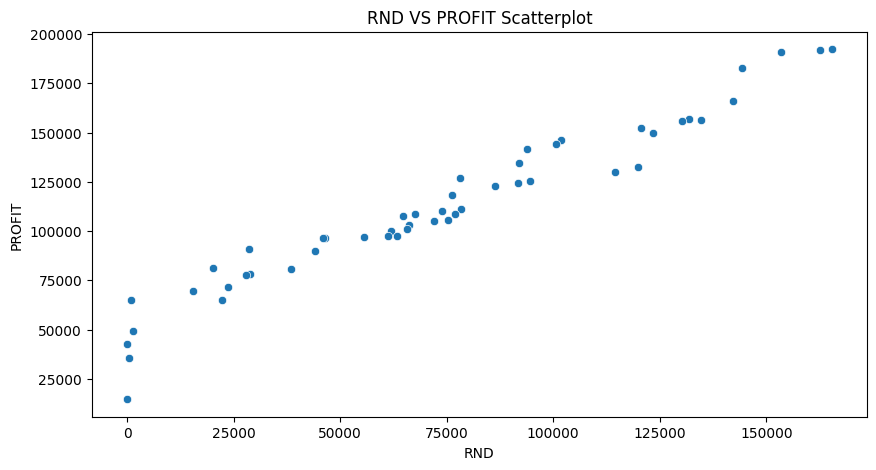

In [12]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df,x='RND',y='PROFIT')
plt.title('RND VS PROFIT Scatterplot')
plt.show()

Step 4: Build the Linear Regression Model

In [13]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X,Y)

LinearRegression()

In [14]:
model.intercept_

array([49032.89914125])

In [15]:
model.coef_

array([[0.85429137]])


Step 5: Evaluate the model

In [16]:
#R2 score
model.score(X,Y)

0.9465353160804393

In [17]:
# Estimated values of Profit
ypred=model.predict(X)
ypred[0:5]

array([[190289.29389289],
       [187938.71118575],
       [180116.65707807],
       [172369.00320589],
       [170433.97345032]])

In [20]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(Y,ypred)
print(f'Mean Squared Error(MSE):{mse:.2f}')


Mean Squared Error(MSE):85120931.33


In [19]:
rmse=mse**(1/2)
print(f'Root Mean Squared Error:{rmse:.2f}')


Root Mean Squared Error:9226.10


In [22]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(Y,ypred)
print(f'Mean Absolute Error(MAE):{mae:.2f}')

Mean Absolute Error(MAE):6910.98


In [25]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(Y, ypred)
print(f'Mean Absoute Percentage Error (MAPE) : {mape*100:.2f} %')


Mean Absoute Percentage Error (MAPE) : 11.07 %


In [24]:
from sklearn.metrics import r2_score
r2=r2_score(Y,ypred)
print(f'R2 score:{r2:.4f}')


R2 score:0.9465


Because R2 score is 0.9456 > 0.8 it is a very good model

Visualizing straight line fit

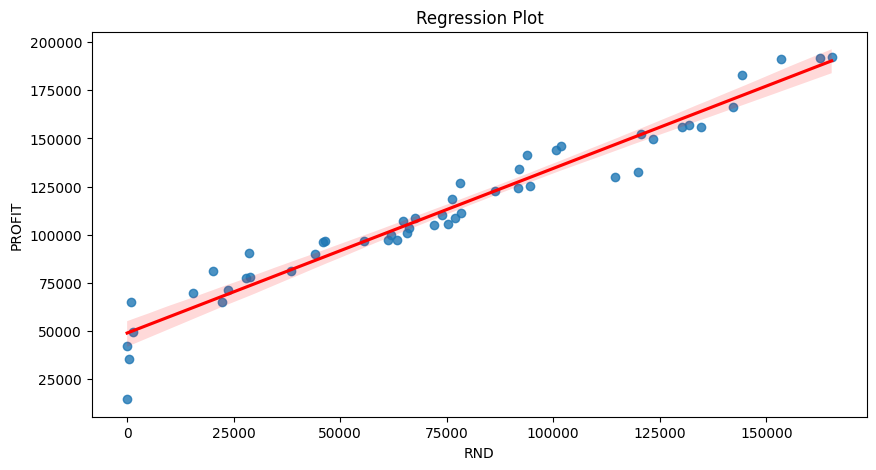

In [27]:
plt.figure(figsize=(10,5))
sns.regplot(data=df,x='RND',y='PROFIT',line_kws={'color':'red'})
plt.title('Regression Plot')
plt.show()



Predicting out of sample data

In [28]:

rnd = [[110000]]
profit_est = model.predict(rnd)[0][0]
print(f'Estimated Profit is : {profit_est:.2f}')


Estimated Profit is : 143004.95
